<a href="https://colab.research.google.com/github/parthsavaliya01/Auto-email-sender/blob/main/Online_Payments_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Transaction Fraud Detection: A Machine Learning Case Study**

##📝 **Project Overview**

**Objective**:

This project aims to detect fraudulent financial transactions using machine learning techniques. With the increasing volume of digital transactions, it has become crucial for financial institutions and payment service providers to develop efficient fraud detection systems. Leveraging a synthetic dataset generated by the PaySim simulator—which mimics real-world financial transactions—we perform exploratory data analysis (EDA), feature engineering, and machine learning modeling to identify fraudulent activities.

**Tools & Technologies:**

* Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn)

* Google Colab


**Outcome:**

Build and evaluate machine learning models capable of accurately identifying potentially fraudulent transactions in near real-time, helping to reduce financial losses and improve security.

##❗ **Problem Statement**

Financial fraud, particularly in digital transactions, poses a significant threat to both consumers and businesses. The challenge lies in detecting fraudulent transactions hidden among millions of legitimate ones—especially when fraud cases are extremely rare, leading to class imbalance. The goal of this project is to:

Develop a robust machine learning model that can accurately classify whether a transaction is fraudulent or not, based on various transactional features.

**This involves:**

* Understanding transaction patterns via EDA

* Engineering meaningful features

* Handling class imbalance

* Training and evaluating multiple classification algorithms

Minimizing false negatives (failing to detect fraud) while controlling false positives (flagging legitimate transactions)



## 📊 **Dataset Description**

This project uses a synthetic dataset generated by the **PaySim simulator**, which mimics real-world mobile money transaction data. The dataset consists of **6.3 million+ rows and 11 columns**, representing various transaction types and statuses.

**Key Columns:**

| Column Name      | Description                                                                 |
| ---------------- | --------------------------------------------------------------------------- |
| `step`           | Hourly time step in the simulation (1 = first hour, 2 = second hour, etc.)  |
| `type`           | Type of transaction (e.g., `CASH_OUT`, `TRANSFER`, `PAYMENT`, etc.)         |
| `amount`         | Amount involved in the transaction                                          |
| `nameOrig`       | Customer ID of the sender                                                   |
| `oldbalanceOrg`  | Initial balance of sender before the transaction                            |
| `newbalanceOrig` | Balance of sender after the transaction                                     |
| `nameDest`       | Customer ID of the receiver                                                 |
| `oldbalanceDest` | Initial balance of receiver before the transaction                          |
| `newbalanceDest` | Balance of receiver after the transaction                                   |
| `isFraud`        | **Target variable** – 1 if the transaction is fraudulent, 0 otherwise       |
| `isFlaggedFraud` | Flagged by the system as potential fraud (based on a fixed threshold logic) |



## 🔍 **Methodology**



The project workflow follows these major steps:

1. **Data Collection & Understanding**

   * Load and inspect the dataset
   * Check for data quality issues and missing values

2. **Exploratory Data Analysis (EDA)**

   * Analyze class imbalance
   * Understand transaction patterns across `type`, `amount`, and time (`step`)
   * Visualize fraudulent vs. legitimate transaction behavior

3. **Data Preprocessing**

   * Handle irrelevant or redundant columns
   * Encode categorical variables (e.g., `type`)
   * Scale numerical features
   * Address class imbalance (via oversampling, undersampling, or SMOTE)

4. **Feature Engineering**

   * Create new features like transaction delta (amount difference), ratio features, etc.
   * Investigate sender/receiver behavior patterns

5. **Model Building**

   * Try multiple classification algorithms: Logistic Regression, Random Forest, XGBoost, etc.
   * Use cross-validation and hyperparameter tuning

6. **Model Evaluation**

   * Use metrics suitable for imbalanced classification:
     **Precision**, **Recall**, **F1-Score**, **ROC-AUC**, **Confusion Matrix**
   * Focus on minimizing False Negatives (missed fraud)

7. **Model Interpretation**

   * Use SHAP values or feature importance to understand model behavior

8. **Conclusion and Future Work**

   * Summarize findings
   * Suggest improvements or real-world deployment considerations

## ***Let's Begin !***

###⚙️ **Data Preprocessing**

This stage involves preparing the raw dataset for analysis and modeling. It includes loading the data, checking for missing or duplicated records, correcting data types, and dropping irrelevant columns. We also convert categorical variables (like transaction type) into numerical form using Label Encoding. Outliers in high-variance columns such as amount and balance fields are identified and treated using statistical techniques like Z-score. Additionally, we create derived features (e.g., converting the step column into hourly time format) to enrich the dataset and improve model performance.

**Imports and Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid')
plt.style.use('ggplot')
%matplotlib inline



---



**Load the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv')

# using 'snappy' compression for faster read/write and decent compression ratio.
df.to_parquet('/content/drive/MyDrive/PS_20174392719_1491204439457_log.parquet', compression='snappy')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0




---



**Basic Info and Summary**

In [ ]:
df.shape
# The dataset contains around 6.3 million rows and 11 columns

(6362620, 11)

In [ ]:
df.info()
# Displays column names, data types, non-null counts, and memory usage of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'] , axis=1 , inplace=True) # These columns was dropped as it is not relevant for the analysis.

In [ ]:
df.isnull().sum()
# All columns have complete data with no missing values

,0
step,0
type,0
amount,0
oldbalanceOrg,0
newbalanceOrig,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()
# Dataset has 543 Duplicate rows

np.int64(543)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00


In [ ]:
df['type'].describe()

,type
count,6362620
unique,5
top,CASH_OUT
freq,2237500


The dataset is clean, with no missing values and all features correctly formatted with appropriate data types, But contain some duplicate rows.




---



**Handling Outlier**

In [ ]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

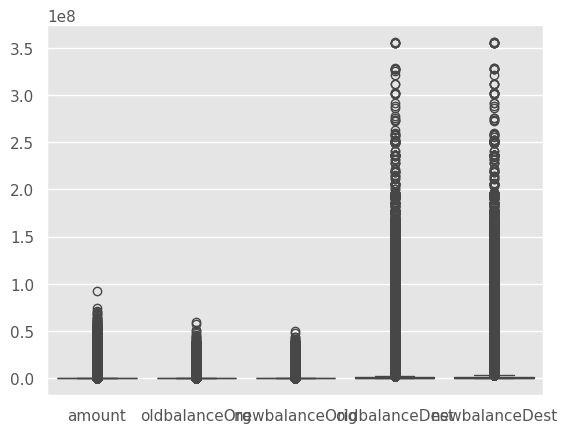

In [ ]:
sns.boxplot(df[numerical_cols])
plt.show()

Some columns contain significant outliers that need to be addressed for better analysis and model performance.

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = df[numerical_cols].apply(zscore)

# Filter rows where all Z-scores are within the threshold (e.g., ±3)
df = df[(z_scores.abs() < 3).all(axis=1)]

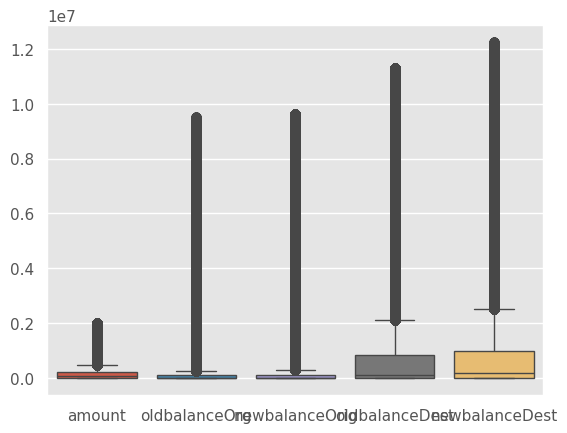

In [ ]:
sns.boxplot(df[numerical_cols])
plt.show()

After applying Z-score filtering, most of the significant outliers have been removed.



---



**Categorical Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'type' column and store the numerical labels in a new column 'type_num'
df['type_num'] = label_encoder.fit_transform(df['type'])

In [ ]:
df['type_num'].value_counts()

,count
type_num,
1,2200552
3,2150936
0,1221678
4,476151
2,40734


In [ ]:
# 'step' represents time steps in hours; converting it to hour of the day (0 to 23)
df['hour'] = df['step'] % 24

In [ ]:
# Final Dataset
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_num,hour
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,3,1
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,3,1
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,4,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,1,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,3,1
...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,1258818.82,0.00,503464.50,1762283.33,1,1,23
6362614,743,TRANSFER,339682.13,339682.13,0.00,0.00,0.00,1,4,23
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,1,23
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,4,23


###📊 **Exploratory Data Analysis (EDA)**

EDA focuses on understanding the structure, patterns, and relationships within the data. We analyze the distribution of key numerical variables, detect outliers, and examine correlations between features. Boxplots, histograms, and group-based aggregations help uncover trends, such as how transaction types relate to fraud, which hours are riskier, or how balances behave in fraudulent vs. non-fraudulent cases. This step helps us gain insights and make data-driven decisions about feature selection and model design.

#### **Univariate Analysis**

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
step,6090589.0,242.97,142.56,1.0,155.00,237.00,334.00,743.00
amount,6090589.0,144972.31,213816.58,0.0,12694.14,69350.24,202674.01,1991430.28
oldbalanceOrg,6090589.0,454648.53,1426577.28,0.0,0.00,12088.22,99085.00,9498553.06
newbalanceOrig,6090589.0,474016.36,1467736.92,0.0,0.00,0.00,116368.45,9627013.37
oldbalanceDest,6090589.0,818180.43,1630656.64,0.0,0.00,97109.03,841520.71,11298055.31
newbalanceDest,6090589.0,907441.18,1696019.22,0.0,0.00,185546.52,1002388.97,12247251.93
isFraud,6090589.0,0.00,0.03,0.0,0.00,0.00,0.00,1.00
type_num,6090589.0,1.75,1.33,0.0,1.00,1.00,3.00,4.00
hour,6090589.0,15.33,4.33,0.0,12.00,16.00,19.00,23.00


In [ ]:
df.describe(include='object').round(2).T

,count,unique,top,freq
type,6090589,5,CASH_OUT,2200551




---



**Transaction Type Distribution**

In [ ]:
df['type'].value_counts()

,count
type,
CASH_OUT,2200552
PAYMENT,2150936
CASH_IN,1221678
TRANSFER,476151
DEBIT,40734


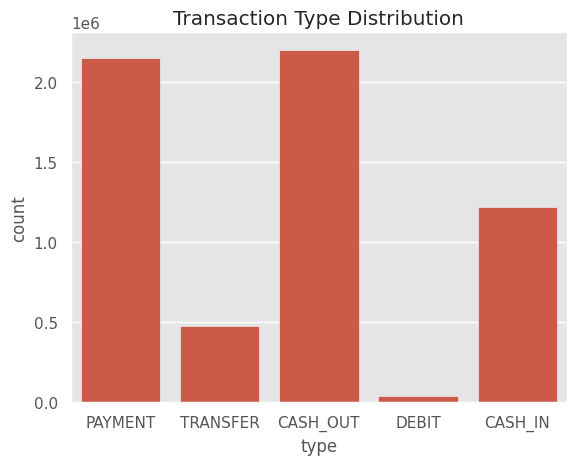

In [ ]:
sns.countplot(x='type', data=df)
plt.title('Transaction Type Distribution')
plt.show()

`CASH_OUT` has the highest number of transactions, followed by `PAYMENT`. In contrast, `DEBIT` has the lowest transaction count, with `TRANSFER` slightly higher.



---



**Fraud vs Not Fraud Distribution**

In [ ]:
# Count occurrences of each class (0 = not fraud, 1 = fraud)
fraud_counts = df['isFraud'].value_counts()
fraud_counts

,count
isFraud,
0,6083567
1,6484


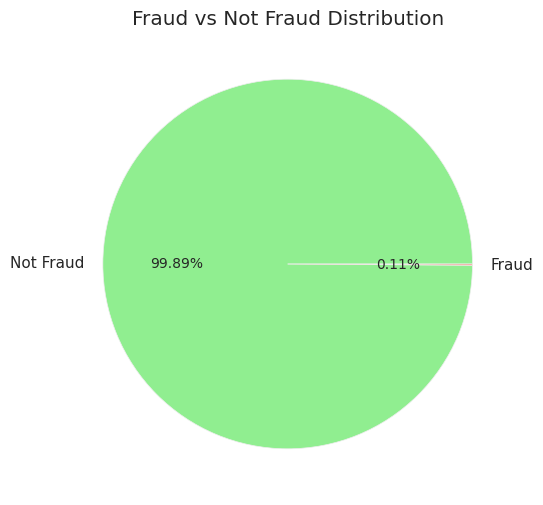

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.2f%%', colors=['lightgreen', 'salmon'])
plt.title('Fraud vs Not Fraud Distribution')
plt.show()

Only 0.11% of all transactions are labeled as fraudulent, indicating a highly imbalanced dataset.



---



**Distribution of Transaction Hours**

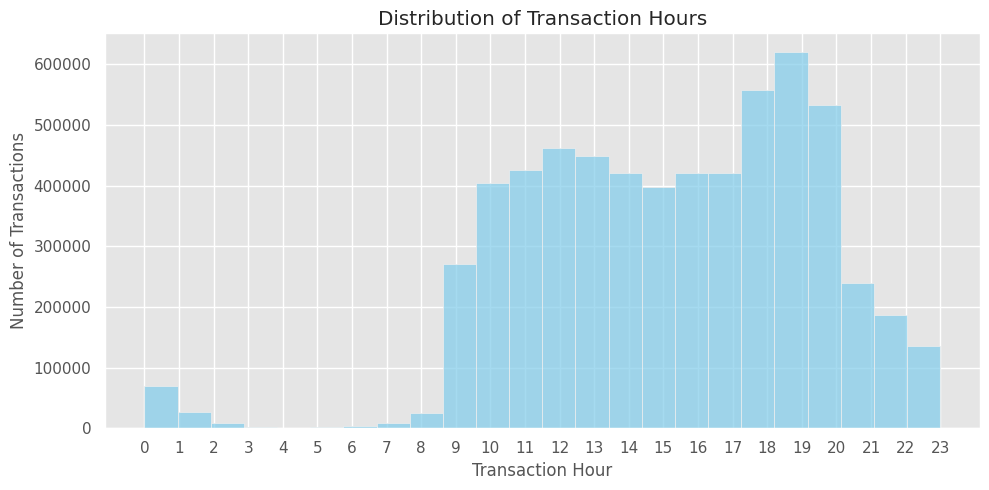

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['hour'], bins=24, kde=False, color='skyblue')

plt.title('Distribution of Transaction Hours')
plt.xlabel('Transaction Hour')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Set x-ticks from 0 to 23 for clarity
plt.tight_layout()
plt.show()



---



**Average Transaction Amount by Type**

In [ ]:
avg_amount = df.groupby('type')['amount'].mean().round(2).sort_values(ascending=False).reset_index()
avg_amount

,type,amount
0,TRANSFER,554836.96
1,CASH_OUT,174036.05
2,CASH_IN,169804.97
3,PAYMENT,13058.93
4,DEBIT,5478.12


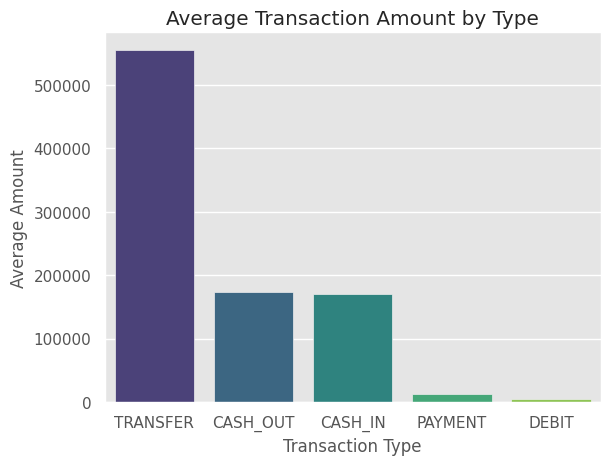

In [ ]:
sns.barplot(data=avg_amount, x='type', y='amount', palette='viridis')
plt.title('Average Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount')
plt.show()



---



**Fraud count by Type**

In [ ]:
fraud_counts_by_type = df[df['isFraud'] == 1].groupby('type').size().sort_values(ascending=False).reset_index()
fraud_counts_by_type

,type,0
0,TRANSFER,3247
1,CASH_OUT,3237


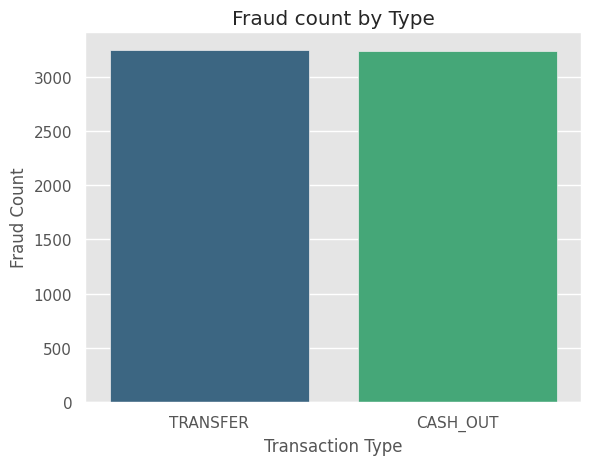

In [ ]:
sns.barplot(data=fraud_counts_by_type, x='type', y=0, palette='viridis')
plt.title('Fraud count by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.show()



---



**Hour with highest risk of fraud**

In [ ]:
fraud_counts_by_hour = df[df['isFraud'] == 1].groupby('hour').size().sort_values(ascending=False).reset_index()
fraud_counts_by_hour

,hour,0
0,1,311
1,6,292
2,15,290
3,5,288
4,8,285
5,19,284
6,18,282
7,10,281
8,7,279
9,13,278


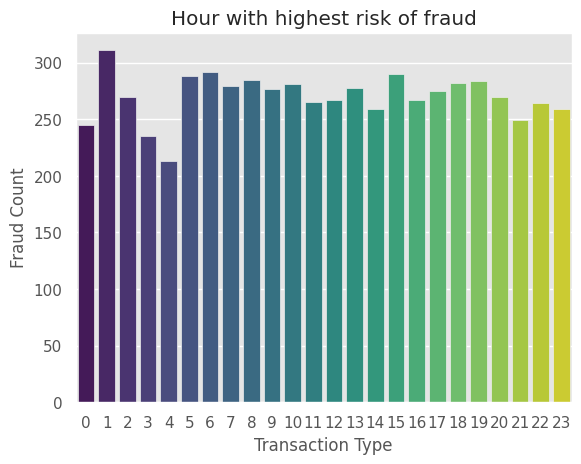

In [ ]:
sns.barplot(data=fraud_counts_by_hour, x='hour', y=0, palette='viridis')
plt.title('Hour with highest risk of fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Count')
plt.show()



---



#### **Bivariate  Analysis**

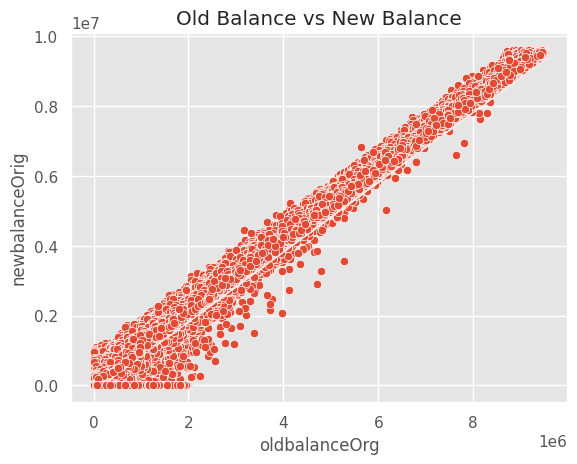

In [ ]:
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig')
plt.title('Old Balance vs New Balance')
plt.show()

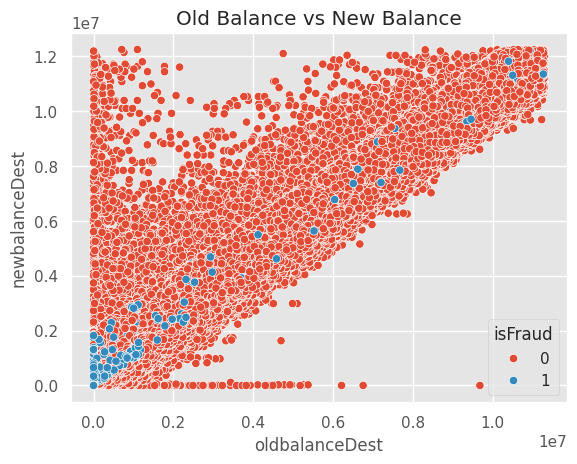

In [ ]:
sns.scatterplot(data=df, x='oldbalanceDest', y='newbalanceDest', hue='isFraud')
plt.title('Old Balance vs New Balance')
plt.show()

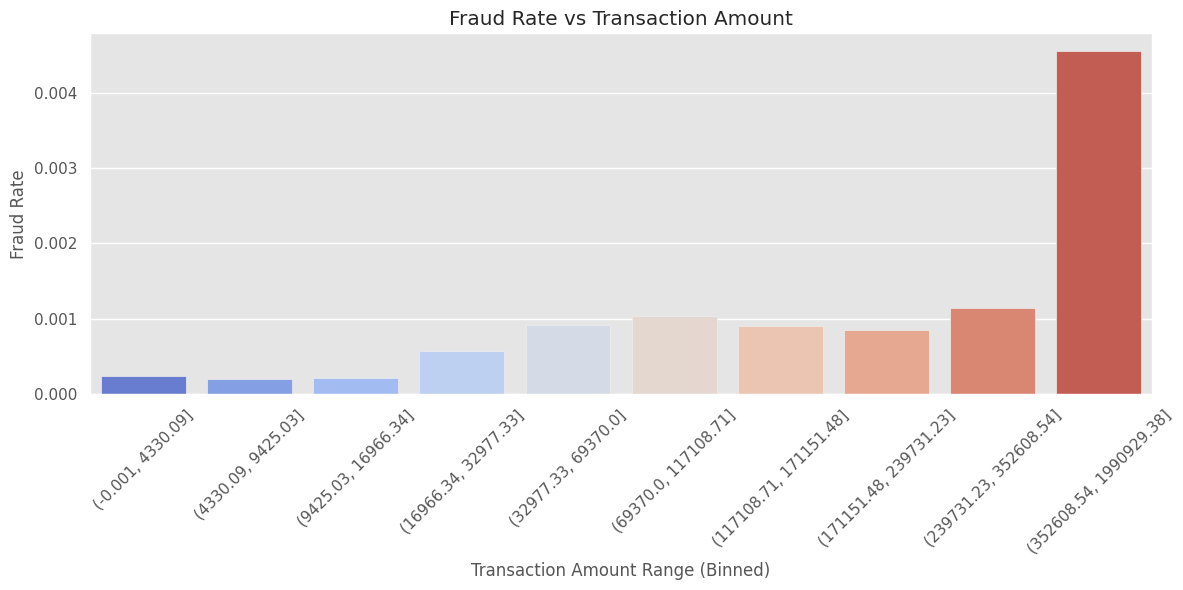

In [ ]:
# Create bins for amount
df['amount_bin'] = pd.qcut(df['amount'], q=10, duplicates='drop')  # 10 quantile bins

# Calculate fraud rate per bin
fraud_rate_by_bin = df.groupby('amount_bin')['isFraud'].mean().reset_index()

# BarPlot
plt.figure(figsize=(12, 6))
sns.barplot(x='amount_bin', y='isFraud', data=fraud_rate_by_bin, palette='coolwarm')

plt.xticks(rotation=45)
plt.xlabel('Transaction Amount Range (Binned)')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate vs Transaction Amount')
plt.tight_layout()
plt.show()



---



#### **Multivariate  Analysis**

In [ ]:
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest','isFraud' , 'hour']

In [ ]:
# Calculate correlation only on numerical features
corr_matrix = df[numerical_cols].corr().round(2)

corr_matrix

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour
amount,1.00,0.02,0.02,0.27,0.37,0.05,-0.06
oldbalanceOrg,0.02,1.00,1.00,0.12,0.08,0.00,-0.01
newbalanceOrig,0.02,1.00,1.00,0.13,0.08,-0.01,-0.01
oldbalanceDest,0.27,0.12,0.13,1.00,0.99,-0.01,-0.00
newbalanceDest,0.37,0.08,0.08,0.99,1.00,-0.01,-0.01
isFraud,0.05,0.00,-0.01,-0.01,-0.01,1.00,-0.03
hour,-0.06,-0.01,-0.01,-0.00,-0.01,-0.03,1.00


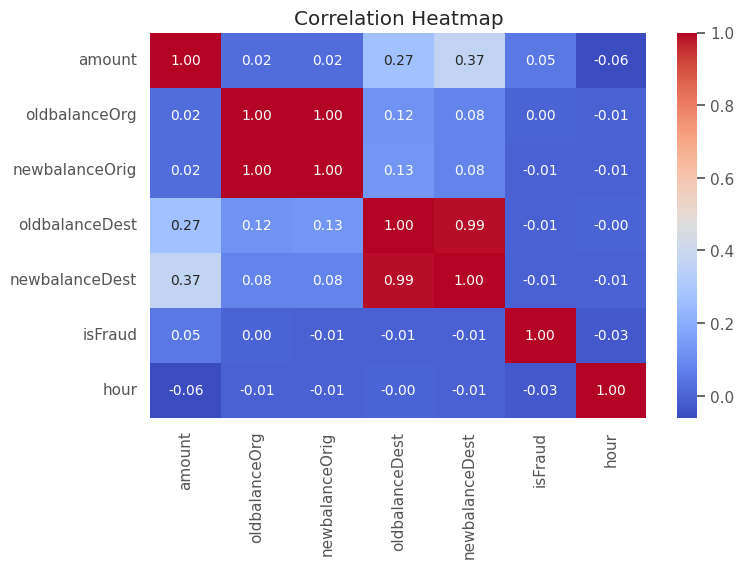

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

###🤖 **Model Selection, Training & Evaluation**

In this phase, we select appropriate machine learning models for binary classification (fraud vs. non-fraud). Popular models like Logistic Regression, Decision Trees, Random Forest, and XGBoost are considered. We handle class imbalance using techniques like SMOTE or undersampling. The dataset is split into training and test sets, and models are evaluated using metrics such as Precision, Recall, F1-score, and ROC-AUC. The best-performing model is chosen based on its ability to accurately detect fraudulent transactions while minimizing false positives.

**Train / Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Features
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'hour']]

# Target
y = df['isFraud']

# Train-test split (stratify keeps fraud ratio same in both sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train.shape , X_test.shape

((4872040, 6), (1218011, 6))

In [ ]:
y_train.shape , y_test.shape

((4872040,), (1218011,))



---



**DecisionTree Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("Decision Tree Evaluation:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_dt))


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1216714
           1       0.85      0.81      0.83      1297

    accuracy                           1.00   1218011
   macro avg       0.92      0.91      0.91   1218011
weighted avg       1.00      1.00      1.00   1218011

ROC AUC: 0.9058582870810057


In [ ]:
pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1216523,191
1,244,1053




---



**RandomForest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1216714
           1       0.95      0.66      0.78      1297

    accuracy                           1.00   1218011
   macro avg       0.97      0.83      0.89   1218011
weighted avg       1.00      1.00      1.00   1218011

ROC AUC: 0.9873080945530769


In [ ]:
pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1216613,101
1,501,796




---



**XGBoost Model**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Evaluation:")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_xgb))

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1216714
           1       0.93      0.71      0.80      1297

    accuracy                           1.00   1218011
   macro avg       0.96      0.85      0.90   1218011
weighted avg       1.00      1.00      1.00   1218011

ROC AUC: 0.9990087828722601


In [ ]:
print(confusion_matrix(y_test, y_pred_xgb))

[[1216640      74]
 [    380     917]]


###💡 **Conclusion**

In this project, we developed a machine learning-based fraud detection system using a synthetic dataset generated by the PaySim simulator, which mimics real-world financial transactions.

**🔍 Key Findings:**

* The dataset contained **\~6.3 million transactions**, with only **0.11% labeled as fraudulent**, highlighting a strong class imbalance.
* After preprocessing and exploration, we observed that **fraudulent transactions were mostly of type `TRANSFER` and `CASH_OUT`**, and often involved **large amounts** and **unusual balance behaviors**.
* Feature engineering steps like **hour extraction from step**, label encoding, and **outlier handling (via Z-score)** improved data quality and model performance.

**📊 Model Evaluation:**

We implemented and compared three models:

| Model         | Precision (Fraud) | Recall (Fraud) | F1-score (Fraud) | ROC-AUC   |
| ------------- | ----------------- | -------------- | ---------------- | --------- |
| Decision Tree | 0.85              | 0.81           | 0.83             | 0.91      |
| Random Forest | 0.95              | 0.66           | 0.78             | 0.99      |
| **XGBoost**   | **0.93**          | **0.71**       | **0.80**         | **0.999** |

✅ **XGBoost** emerged as the best-performing model with the highest ROC-AUC and a strong balance between precision and recall.

**🚀 Final Thoughts:**

* This model can be effectively deployed in a real-time fraud detection system where **accuracy and early detection are critical**.
* Using tree-based models like XGBoost allows for interpretability and scalability, making it a suitable candidate for financial institutions.
* Future work can include **handling imbalanced data more robustly**, testing on **real-world data**, and **incorporating time-based patterns** or user behavior modeling.
